# Advanced Topics in Machine Learning

## Introduction

We are diving into some foundational and practical topics that are essential for becoming confident with supervised learning. From improving model performance through cross-validation to understanding the statistical principles behind machine learning.

---

## Cross-Validation

**What is it?** Cross-validation is a method for testing a model's performance on unseen data by splitting the dataset into training and validation sets multiple times.

**Analogy**: Think of studying for a test using flashcards. You shuffle the cards and test yourself with different subsets, so you don’t memorize just the order.

### Example

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=10)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(np.array([[1]]))
print("Predictions for input [1]:", y_pred)
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)

Predictions for input [1]: [30.90721766]
Cross-validation scores: [0.89834484 0.90215372 0.95524816 0.87523408 0.93293219]


### Transform to see perfomance diff

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

model.fit(X_scaled, y_scaled)

y_pred = model.predict(np.array([[1]]))
print("Predictions for input [1]:", y_pred)

scores = cross_val_score(model, X_scaled, y_scaled, cv=5)
print("Cross-validation scores:", scores)

X_scaled = sm.add_constant(X_scaled)
sm_model = sm.OLS(y_scaled, X_scaled).fit()

print("\n")
print("\n")
print(sm_model.summary())


Predictions for input [1]: [[0.96192573]]
Cross-validation scores: [0.89834484 0.90215372 0.95524816 0.87523408 0.93293219]




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1214.
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           5.18e-57
Time:                        18:50:14   Log-Likelihood:                -12.179
No. Observations:                 100   AIC:                             28.36
Df Residuals:                      98   BIC:                             33.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---

**Explanation**:

- `cv=5` means the dataset is split into 5 folds.
- Each fold gets a turn as the validation set.
- Helps us assess performance more reliably.

---



## Statistical Learning Theory

Statistical learning is the backbone of machine learning. It helps answer: *How well can our model generalize to new data?*

### Key Concept: Risk Minimization

- **Empirical Risk**: Error on the training set.
  
$$
R(f) = \mathbb{E}_{(x,y)}[L(y, f(x))]
$$

- **Expected Risk**: Error on new, unseen data.
- We aim to minimize expected risk.
  
$$
\hat{R}(f) = \frac{1}{n} \sum_{i=1}^{n} L(y_i, f(x_i))
$$

---

Empirical Risk (Training Error): 2.8976666407056664
Expected Risk (Testing Error): 4.683447700878508


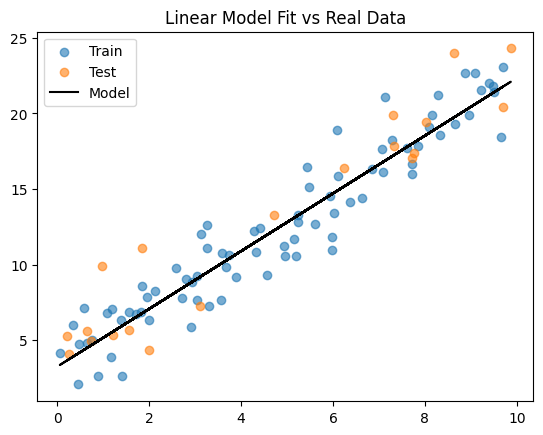

In [ ]:

# Generate data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 points between 0 and 10
y = 2 * X.flatten() + 3 + np.random.randn(100) * 2  # Linear with noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate empirical and expected risk
empirical_risk = mean_squared_error(y_train, y_train_pred)
expected_risk = mean_squared_error(y_test, y_test_pred)

print("Empirical Risk (Training Error):", empirical_risk)
print("Expected Risk (Testing Error):", expected_risk)

# Plot
plt.scatter(X_train, y_train, label='Train', alpha=0.6)
plt.scatter(X_test, y_test, label='Test', alpha=0.6)
plt.plot(X, model.predict(X), color='black', label='Model')
plt.legend()
plt.title('Linear Model Fit vs Real Data')
plt.show()



## Bias-Variance Tradeoff

- **Bias**: Error due to overly simple models (e.g., linear model on curved data).
- **Variance**: Error due to overly complex models (model fits noise).

**Analogy**: Imagine trying to shoot arrows at a target.

- High bias = arrows far from the target.
- High variance = arrows scattered everywhere.
- Good model = tight cluster near the center.



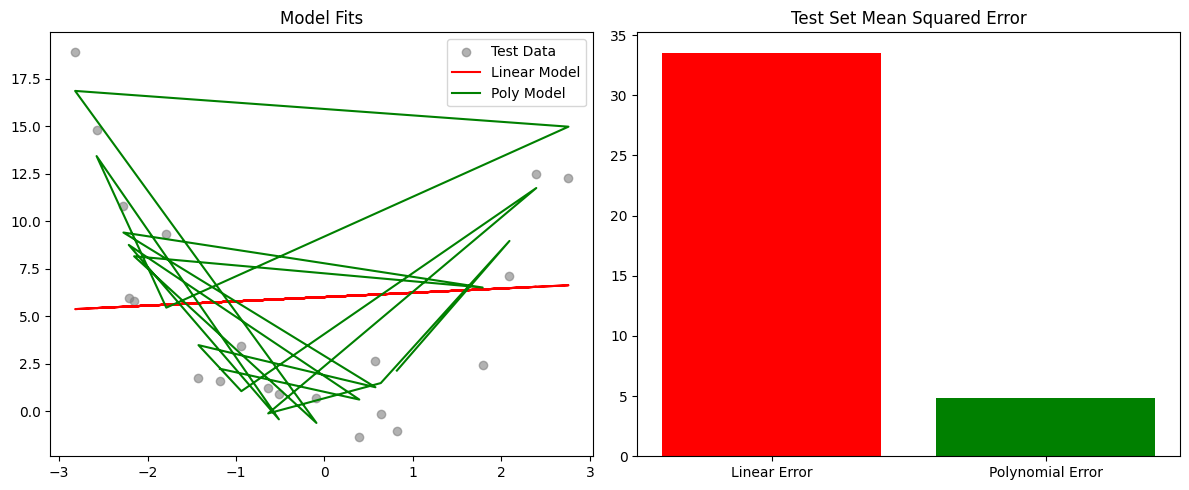

In [ ]:
# Generate nonlinear data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X.flatten()**2 + np.random.randn(100) * 2  # Quadratic + noise

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear model (high bias)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Polynomial model (low bias, potentially high variance)
poly_features = PolynomialFeatures(degree=10)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Plotting
plt.figure(figsize=(12,5))

# Actual data
plt.subplot(1,2,1)
plt.scatter(X_test, y_test, label='Test Data', color='gray', alpha=0.6)
plt.plot(X_test, y_pred_lin, label='Linear Model', color='red')
plt.plot(X_test, y_pred_poly, label='Poly Model', color='green')
plt.title('Model Fits')
plt.legend()

# Errors
plt.subplot(1,2,2)
plt.bar(['Linear Error', 'Polynomial Error'],
        [mean_squared_error(y_test, y_pred_lin), mean_squared_error(y_test, y_pred_poly)],
        color=['red', 'green'])
plt.title('Test Set Mean Squared Error')
plt.tight_layout()
plt.show()


---

## Ridge and Lasso Regression

These are **regularized** versions of linear regression.

### Ridge (L2 Penalty):

Penalizes large coefficients.

Formula:

$$
\text{Loss} = \text{MSE} + \lambda \sum w_i^2
$$

### Lasso (L1 Penalty):

Penalizes absolute values of coefficients and can shrink some to zero.

Formula:

$$
\text{Loss} = \text{MSE} + \lambda \sum |w_i|
$$

### Example

In [ ]:

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X, y)
lasso.fit(X, y)

print("Ridge Coef:", ridge.coef_)
print("Lasso Coef:", lasso.coef_)

Ridge Coef: [60.42380263]
Lasso Coef: [60.90045679]


## RidgeCV and LassoCV

**RidgeCV** and **LassoCV** are versions of Ridge and Lasso regression that automatically select the best regularization parameter (alpha) using cross-validation.

- **RidgeCV**: Ridge regression with built-in cross-validation for alpha.
- **LassoCV**: Lasso regression with built-in cross-validation for alpha.

### Example:

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

# RidgeCV and LassoCV automatically select the best alpha using cross-validation
ridgecv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
lassocv = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)

ridgecv.fit(X, y)
lassocv.fit(X, y)

print('Best alpha for RidgeCV:', ridgecv.alpha_)
print('Best alpha for LassoCV:', lassocv.alpha_)
print('RidgeCV Coef:', ridgecv.coef_)
print('LassoCV Coef:', lassocv.coef_)

**Explanation**:

- Regularization helps avoid overfitting.
- Lasso can help with feature selection by reducing some coefficients to 0.

---

## Logistic Regression - Introduction

Used for classification tasks (e.g., spam or not).

### Logistic Function (Sigmoid):

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Maps any number to [0, 1].

### Example:

In [ ]:
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

## KMeans Clustering

**KMeans** is an unsupervised learning algorithm that groups data into a specified number of clusters based on feature similarity.

- Useful for finding patterns or groups in data without labels.

### Example:

In [ ]:
from sklearn.cluster import KMeans

# KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
print('Cluster labels:', labels)


---

## Logistic Regression in scikit-learn

In [ ]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9555555555555556


**Explanation**:

- Trains a logistic regression model on flower data.
- Measures accuracy on unseen test data.

---

## MLE and Logistic Regression

**Maximum Likelihood Estimation (MLE)** helps find model parameters that maximize the likelihood of observed data.

In logistic regression, we choose coefficients that make our observed labels most probable given our input features.

### Mathematical View:

$$
\text{If } y_i \text{ is the label:}\quad L = \prod_{i=1}^{n} P(y_i|x_i; w) \\
\text{Take log, differentiate, and solve to find } w.
$$

---

## Gradient Descent

**What is it?** An optimization algorithm to minimize loss.

**Analogy**: Like walking downhill to find the lowest point.

### Example:

In [ ]:
# Simple gradient descent on MSE
w = 0  # Initial weight
lr = 0.1  # Learning rate
X = np.array([1, 2, 3])
y = np.array([2, 4, 6])

for i in range(100):
    y_pred = w * X
    error = y - y_pred
    grad = -2 * (X * error).mean()
    w = w - lr * grad

print("Optimized weight:", w)

**Explanation**:

- Gradually updates `w` to minimize the mean squared error.


## KFold Cross-Validation

**KFold** is a cross-validation strategy that splits the data into K consecutive folds (subsets). Each fold is used once as a validation while the K-1 remaining folds form the training set.

- Useful for evaluating model performance more robustly.

### Example:

In [ ]:
from sklearn.model_selection import KFold

# KFold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Fold {fold+1}: Train indices {train_index}, Test indices {test_index}')


---

## Exercises

1. Implement 5-fold cross-validation for a classifier of your choice.
2. Train a Ridge and Lasso regression model and compare their coefficients.
3. Write a function to simulate gradient descent on any simple equation.
4. Explore the effect of regularization strength on model performance.
5. Train a logistic regression model and evaluate with accuracy and confusion matrix.

---

## Summary

- Cross-validation improves evaluation reliability.
- Statistical learning theory underpins ML algorithms.
- Bias-variance tradeoff helps balance model complexity.
- Ridge/Lasso combat overfitting.
- Logistic regression is great for binary classification.
- Gradient descent powers most ML training today.

Great job making it through this deep dive!